## IMPORT PACKAGES

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DATA AVAILABILITY

In [7]:
customer=pd.read_csv("D:\Desktop\Alabs\Python\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Customer.csv")
customer.head()

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [8]:
prod_cat_info=pd.read_csv("D:\Desktop\Alabs\Python\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\prod_cat_info.csv")
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [9]:
transaction=pd.read_csv("D:\Desktop\Alabs\Python\Python Foundation Case Study 1 - Retail Case Study\Case Study 1 - Retail Case Study\Transactions.csv")
transaction.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop


### EXPLORATORY DATA ANALYSIS (EDA)

In [10]:
prod_cat_info.rename(columns={'prod_sub_cat_code' : 'prod_subcat_code'},inplace=True)

In [11]:
prod_cat_info.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly

In [12]:
prod_concat=pd.merge(left=transaction,right=prod_cat_info,how='left', on=['prod_subcat_code','prod_cat_code'])
prod_concat.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY


In [13]:
Customer_Final=pd.merge(left=prod_concat,right=customer,how='left',left_on='cust_id',right_on='customer_Id')
Customer_Final.head()

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,26-09-1981,M,5.0
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,11-05-1973,F,8.0
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,08-06-1981,M,3.0
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,27-07-1992,M,8.0


In [14]:
Customer_Final.dtypes

transaction_id        int64
cust_id               int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
customer_Id           int64
DOB                  object
Gender               object
city_code           float64
dtype: object

In [15]:
Customer_Final.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
prod_cat            0
prod_subcat         0
customer_Id         0
DOB                 0
Gender              9
city_code           8
dtype: int64

### CONVERTING DATE FROM OBJECT TO DATETIME

In [16]:
Customer_Final['DOB'] =pd.to_datetime(Customer_Final['DOB'],format='%d-%m-%Y')

In [17]:
Customer_Final.DOB

0       1981-09-26
1       1973-05-11
2       1992-07-27
3       1981-06-08
4       1992-07-27
           ...    
23048   1972-02-21
23049   1984-04-27
23050   1976-06-20
23051   1970-05-22
23052   1982-01-15
Name: DOB, Length: 23053, dtype: datetime64[ns]

In [18]:
Customer_Final['tran_date']=pd.to_datetime(Customer_Final['tran_date'])

C:\Users\UZMA KADRI\AppData\Local\Temp\ipykernel_6528\625963603.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Customer_Final['tran_date']=pd.to_datetime(Customer_Final['tran_date'])


In [19]:
Customer_Final.tran_date

0       2014-02-28
1       2014-02-27
2       2014-02-24
3       2014-02-24
4       2014-02-23
           ...    
23048   2011-01-25
23049   2011-01-25
23050   2011-01-25
23051   2011-01-25
23052   2011-01-25
Name: tran_date, Length: 23053, dtype: datetime64[ns]

## 2. Prepare a summary report for the merged data set.

#### a. Get the column names and their corresponding data types

In [20]:
Customer_Final.dtypes

transaction_id               int64
cust_id                      int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
customer_Id                  int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
dtype: object

#### b. Top/Bottom 10 observations

In [21]:
Customer_Final.head(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
0,80712190438,270351,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,270351,1981-09-26,M,5.0
1,29258453508,270384,2014-02-27,5,3,-5,-1497,785.925,-8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
2,51750724947,273420,2014-02-24,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
3,93274880719,271509,2014-02-24,11,6,-3,-1363,429.345,-4518.345,e-Shop,Home and kitchen,Bath,271509,1981-06-08,M,3.0
4,51750724947,273420,2014-02-23,6,5,-2,-791,166.110,-1748.110,TeleShop,Books,DIY,273420,1992-07-27,M,8.0
5,97439039119,272357,2014-02-23,8,3,-2,-824,173.040,-1821.040,TeleShop,Electronics,Personal Appliances,272357,1982-10-09,F,6.0
6,45649838090,273667,2014-02-22,11,6,-1,-1450,152.250,-1602.250,e-Shop,Home and kitchen,Bath,273667,1981-05-29,M,9.0
7,22643667930,271489,2014-02-22,12,6,-1,-1225,128.625,-1353.625,TeleShop,Home and kitchen,Tools,271489,1971-04-21,M,9.0
8,79792372943,275108,2014-02-22,3,1,-3,-908,286.020,-3010.020,MBR,Clothing,Kids,275108,1971-11-04,F,8.0
9,50076728598,269014,2014-02-21,8,3,-4,-581,244.020,-2568.020,e-Shop,Electronics,Personal Appliances,269014,1979-11-27,F,3.0


In [22]:
Customer_Final.tail(10)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
23043,49882891062,271982,2011-01-25,10,5,4,1330,558.600,5878.600,e-Shop,Books,Non-Fiction,271982,1976-08-10,M,8.0
23044,14787475597,273982,2011-01-25,4,3,5,969,508.725,5353.725,e-Shop,Electronics,Mobiles,273982,1991-10-12,M,4.0
23045,50691119572,273031,2011-01-25,6,5,1,1148,120.540,1268.540,TeleShop,Books,DIY,273031,1980-01-17,F,8.0
23046,40893803228,272049,2011-01-25,11,6,3,1077,339.255,3570.255,e-Shop,Home and kitchen,Bath,272049,1975-06-28,F,6.0
23047,30856003613,266866,2011-01-25,4,2,2,444,93.240,981.240,TeleShop,Footwear,Kids,266866,1974-04-18,M,4.0
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0
23052,77960931771,271961,2011-01-25,11,5,1,447,46.935,493.935,TeleShop,Books,Children,271961,1982-01-15,M,1.0


#### c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [23]:
Customer_Final.describe()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
count,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23045.000000
mean,5.007348e+10,271021.746497,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002,271021.746497,5.482534
std,2.898194e+10,2431.692059,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264,2431.692059,2.863499
min,3.268991e+06,266783.000000,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000,266783.000000,1.000000
25%,2.493864e+10,268935.000000,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000,268935.000000,3.000000
50%,5.009313e+10,270980.000000,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000,270980.000000,5.000000
75%,7.533000e+10,273114.000000,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000,273114.000000,8.000000
max,9.998755e+10,275265.000000,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000,275265.000000,10.000000


#### d. Frequency tables for all the categorical variables

In [24]:
Customer_Final.loc[:, Customer_Final.dtypes==('object')].describe()

,Store_type,prod_cat,prod_subcat,Gender
count,23053,23053,23053,23044
unique,4,6,18,2
top,e-Shop,Books,Women,M
freq,9311,6069,3048,11811


## 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [25]:
Customer_Final_num=Customer_Final.select_dtypes(['int64','float64'])
Customer_Final_obj=Customer_Final.select_dtypes('object')

In [26]:
Customer_Final_num.head()

,transaction_id,cust_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,customer_Id,city_code
0,80712190438,270351,1,1,-5,-772,405.300,-4265.300,270351,5.0
1,29258453508,270384,5,3,-5,-1497,785.925,-8270.925,270384,8.0
2,51750724947,273420,6,5,-2,-791,166.110,-1748.110,273420,8.0
3,93274880719,271509,11,6,-3,-1363,429.345,-4518.345,271509,3.0
4,51750724947,273420,6,5,-2,-791,166.110,-1748.110,273420,8.0


In [27]:
Customer_Final_obj.head()

,Store_type,prod_cat,prod_subcat,Gender
0,e-Shop,Clothing,Women,M
1,e-Shop,Electronics,Computers,F
2,TeleShop,Books,DIY,M
3,e-Shop,Home and kitchen,Bath,M
4,TeleShop,Books,DIY,M


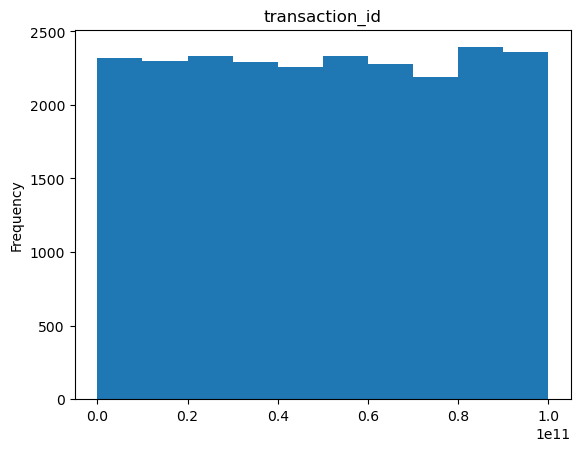

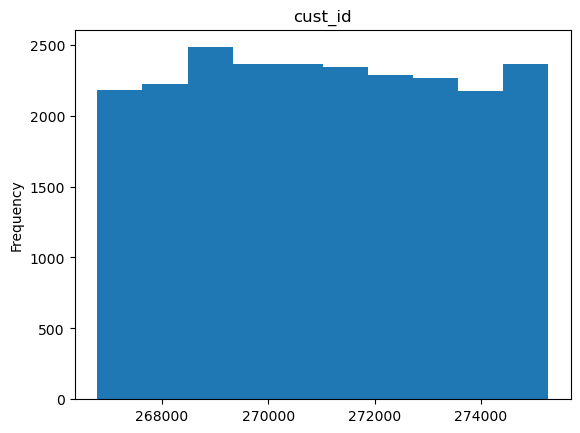

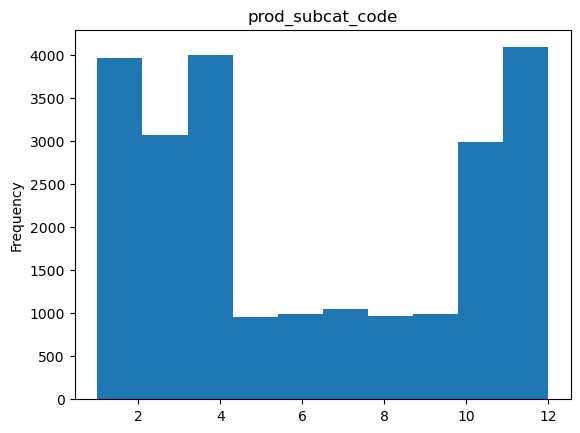

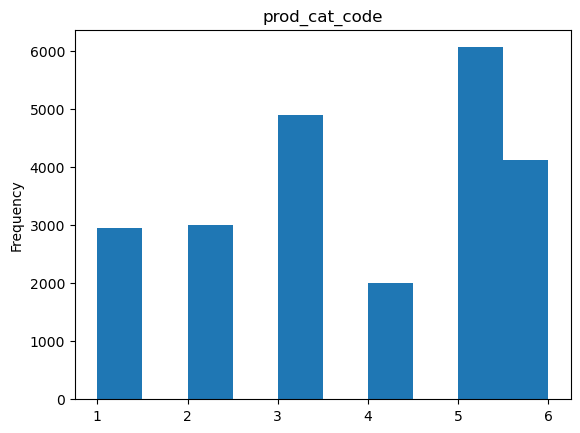

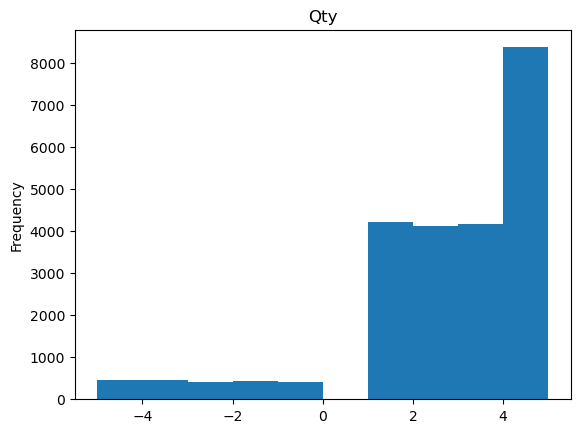

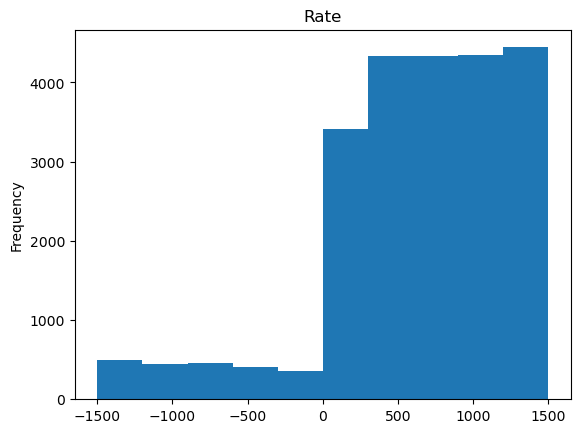

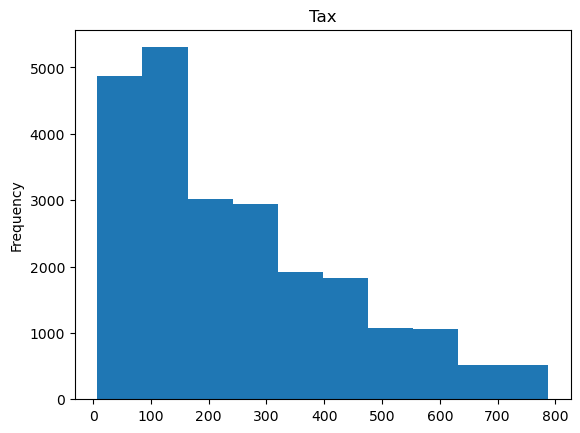

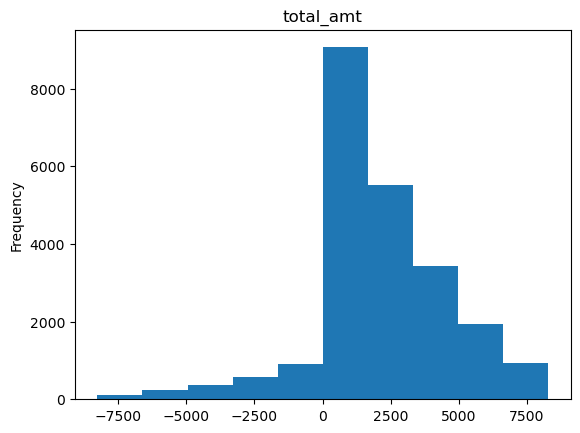

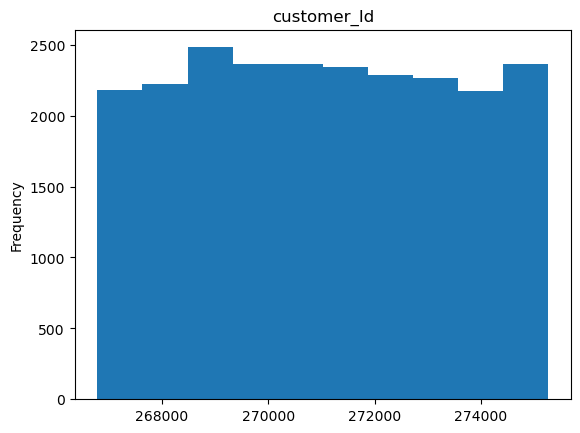

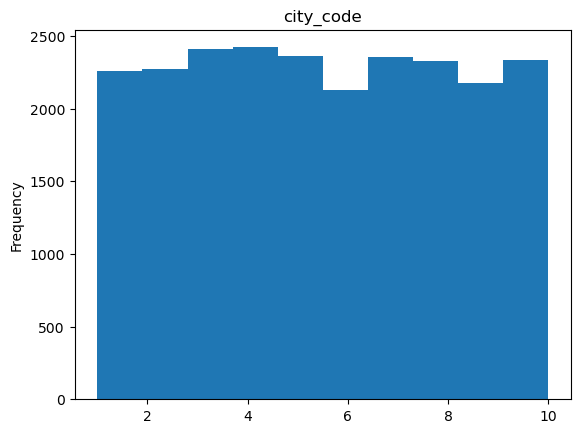

In [28]:
for i in Customer_Final_num.columns:
    Customer_Final_num[i].plot(kind='hist')
    plt.title(i)
    plt.show()

## 4. Calculate the following information using the merged dataset :

#### a. Time period of the available transaction data

In [30]:
Customer_Final.sort_values(by='tran_date')

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
22899,36332303449,268624,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen,268624,1986-09-18,F,1.0
22893,25374972356,268904,2011-01-02,2,6,5,821,431.025,4536.025,MBR,Home and kitchen,Furnishing,268904,1990-05-25,M,5.0
22894,15662366857,272756,2011-01-02,5,3,3,527,166.005,1747.005,e-Shop,Electronics,Computers,272756,1975-12-03,F,9.0
22895,28972634039,275227,2011-01-02,9,3,-1,-334,35.070,-369.070,MBR,Electronics,Cameras,275227,1989-09-23,M,4.0
22896,60041644943,267309,2011-01-02,3,2,1,392,41.160,433.160,Flagship store,Footwear,Women,267309,1973-04-08,F,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,65228973233,270009,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children,270009,1979-04-25,M,3.0
162,83661978186,274678,2014-12-02,10,3,2,325,68.250,718.250,e-Shop,Electronics,Audio and video,274678,1975-05-20,F,9.0
146,17146707816,274897,2014-12-02,12,5,3,622,195.930,2061.930,MBR,Books,Academic,274897,1987-09-16,M,2.0
154,74023090711,271180,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances,271180,1987-11-08,M,4.0


In [31]:
max_date=Customer_Final['tran_date'].max()
max_date

Timestamp('2014-12-02 00:00:00')

In [32]:
min_date=Customer_Final['tran_date'].min()
min_date

Timestamp('2011-01-02 00:00:00')

In [33]:
time_period=pd.Timestamp.strftime(min_date, format='%d-%m-%Y') + ' to ' + pd.Timestamp.strftime(max_date, format='%d-%m-%Y')

In [34]:
print("Time period available for the transaction data is"  ,time_period)

Time period available for the transaction data is 02-01-2011 to 02-12-2014


#### b. Count of transactions where the total amount of transaction was negative

In [35]:
Customer_Final.loc[Customer_Final['total_amt']<0,'transaction_id'].count()

2177

### 5. Analyze which product categories are more popular among females vs male customers.

In [36]:
prod_gender=Customer_Final.groupby(['Gender','prod_cat'])[['Qty']].sum().reset_index()
prod_gender

,Gender,prod_cat,Qty
0,F,Bags,2362
1,F,Books,7070
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3716
5,F,Home and kitchen,4895
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6476


### 6. Which City code has the maximum customers and what was the percentage of customers from that city?

In [37]:
customer_group=Customer_Final.groupby('city_code')['customer_Id'].count().sort_values(ascending=False)
customer_group

city_code
4.0     2422
3.0     2411
5.0     2360
7.0     2356
10.0    2333
8.0     2330
2.0     2270
1.0     2258
9.0     2178
6.0     2127
Name: customer_Id, dtype: int64

In [38]:
percentage=round(customer_group[4.0]/customer_group.sum()*100,2)
percentage

10.51

### 7. Which store type sells the maximum products by value and by quantity?

In [39]:
Customer_Final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending=False)

C:\Users\UZMA KADRI\AppData\Local\Temp\ipykernel_6528\2566221697.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Customer_Final.groupby('Store_type')['Qty','Rate'].sum().sort_values(by='Qty',ascending=False)


,Qty,Rate
Store_type,,
e-Shop,22763,5941001
MBR,11194,2953253
Flagship store,11133,2941557
TeleShop,10984,2834420


### 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [40]:
store_group=Customer_Final.pivot_table(index='prod_cat',columns='Store_type',values='total_amt',aggfunc='sum')
store_group

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1616300.075
Books,2488205.850,2496039.195,2545005.060,5293443.935
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107514.565,1973338.835,4426474.195
Footwear,1234806.560,1112163.715,1235719.290,2637084.710
Home and kitchen,1712567.675,1822403.570,1579702.475,3324319.570


In [41]:
store_group.loc[['Electronics','Clothing'],'Flagship store']

prod_cat
Electronics    2215136.04
Clothing       1194423.23
Name: Flagship store, dtype: float64

### 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [42]:
gender_group=Customer_Final.pivot_table(index='Gender',columns='prod_cat',values='total_amt',aggfunc='sum')
gender_group

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2077985.65,6164692.235,3026750.805,5019354.210,3202552.99,4132177.335
M,2046722.99,6645972.775,3224079.495,5703109.425,3014672.05,4301075.480


In [43]:
gender_group.loc[['M'],'Electronics']

Gender
M    5703109.425
Name: Electronics, dtype: float64

### 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [44]:
pos_amt=Customer_Final.loc[Customer_Final.total_amt>0]
pos_amt

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,customer_Id,DOB,Gender,city_code
10,29258453508,270384,2014-02-20,5,3,5,1497,785.925,8270.925,e-Shop,Electronics,Computers,270384,1973-05-11,F,8.0
11,25455265351,267750,2014-02-20,12,6,3,1360,428.400,4508.400,e-Shop,Home and kitchen,Tools,267750,1986-10-13,M,1.0
12,1571002198,275023,2014-02-20,6,5,4,587,246.540,2594.540,e-Shop,Books,DIY,275023,1971-03-09,M,6.0
14,36554696014,269345,2014-02-20,3,5,3,1253,394.695,4153.695,e-Shop,Books,Comics,269345,1970-06-26,F,10.0
15,56814940239,268799,2014-02-20,7,5,5,368,193.200,2033.200,e-Shop,Books,Fiction,268799,1979-06-27,M,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,2011-01-25,12,5,1,1264,132.720,1396.720,e-Shop,Books,Academic,274550,1972-02-21,M,7.0
23049,89780862956,270022,2011-01-25,4,1,1,677,71.085,748.085,e-Shop,Clothing,Mens,270022,1984-04-27,M,9.0
23050,85115299378,271020,2011-01-25,2,6,4,1052,441.840,4649.840,MBR,Home and kitchen,Furnishing,271020,1976-06-20,M,8.0
23051,72870271171,270911,2011-01-25,11,5,3,1142,359.730,3785.730,TeleShop,Books,Children,270911,1970-05-22,M,2.0


In [45]:
unique_amt=pos_amt.groupby(['customer_Id','prod_cat','prod_subcat'])['transaction_id'].count().reset_index()
unique_amt

,customer_Id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [46]:
unique_amt_count=unique_amt.groupby('customer_Id')['transaction_id'].count().reset_index()
unique_amt_count

,customer_Id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [47]:
unique_amt_count[unique_amt_count['transaction_id']>10]

,customer_Id,transaction_id


##### There is no unique transaction greater than 10